# 1. Import Essential Libraries and Functions

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 2. Load Dataset 

In [3]:
df_fake = pd.read_csv("Data/Fake.csv")
df_real = pd.read_csv("Data/True.csv")

## 2.1. Fake Data Profiling

In [5]:
print("Number of fake articles:", len(df_fake))
df_fake.head()

Number of fake articles: 23481


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
df_fake.shape

(23481, 4)

In [9]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


## 2.2. Real Data Profiling

In [12]:
print("Number of real articles:", len(df_real))
df_real.head()

Number of real articles: 21417


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
df_real.shape

(21417, 4)

In [16]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# 3. Data Transformation

In [18]:
df_fake['label'] = 0 # y values
df_real['label'] = 1 # y values

In [20]:
df = pd.concat([df_fake, df_real], axis = 0).reset_index(drop = True) # Combination of both real and fake data
df["title_text"] = df['title'] + '' + df['text'] #to be used as X data
print("Total number of articles:", len(df)) 
df.head()

Total number of articles: 44898


,title,text,subject,date,label,title_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...


## 3.1. Train Test Split 

In [22]:
X = df['title_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## 3.2. NLP Model (Term Frequency-Inverse Document Frequency)

In [24]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [26]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Logistic Regression

In [28]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

## 4.1. Logistic Regression Validation

In [30]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9863028953229399
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4682
           1       0.98      0.99      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [32]:
r2 = r2_score(y_test, y_pred)
print("r2 score:", round(r2, 3))

r2 score: 0.945


# 5. Visualisation: Confusion Matrix

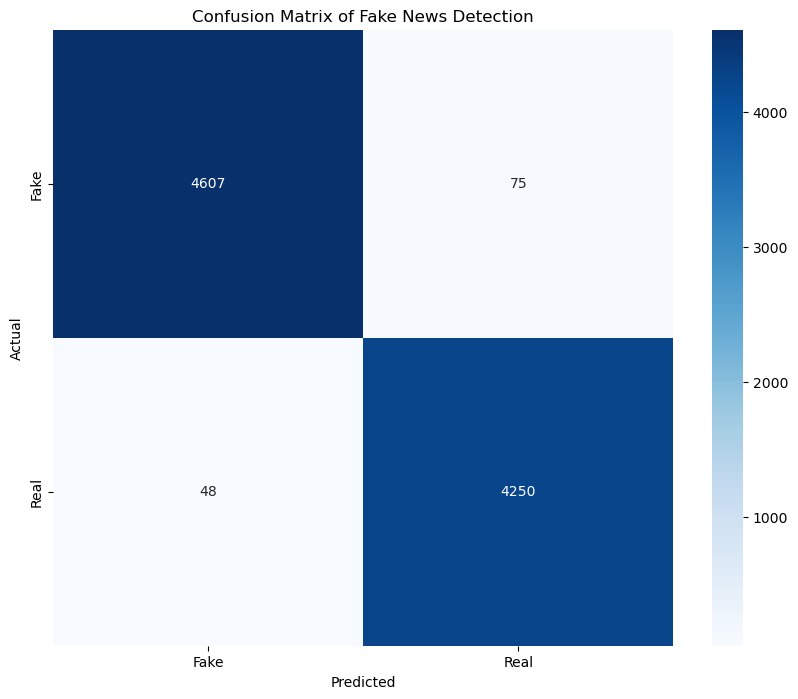

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Fake", "Real"], yticklabels = ["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Fake News Detection")
plt.show()